Importing libraries and loading data

In [1]:
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.decomposition import PCA
from abc import abstractmethod, ABC

df_temp = pd.read_csv('../datasets/daily-min-temperatures.csv' , sep=',')

Output the head of file for verification

In [2]:
df_temp.head(10)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


Display dataset information

In [3]:
print('-' * 30)
print('Daily Minimum Temparature Dataset Information :')
print('-' * 30)
print('Total Rows:', df_temp.shape[0])
print('Total Columns:', df_temp.shape[1])
print('-' * 30)
df_temp.info(memory_usage=False, show_counts=False)

------------------------------
Daily Minimum Temparature Dataset Information :
------------------------------
Total Rows: 3650
Total Columns: 2
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Temp    float64
dtypes: float64(1), object(1)

Output a matrix of missing values

------------------------------
Matrix of missing values :
------------------------------


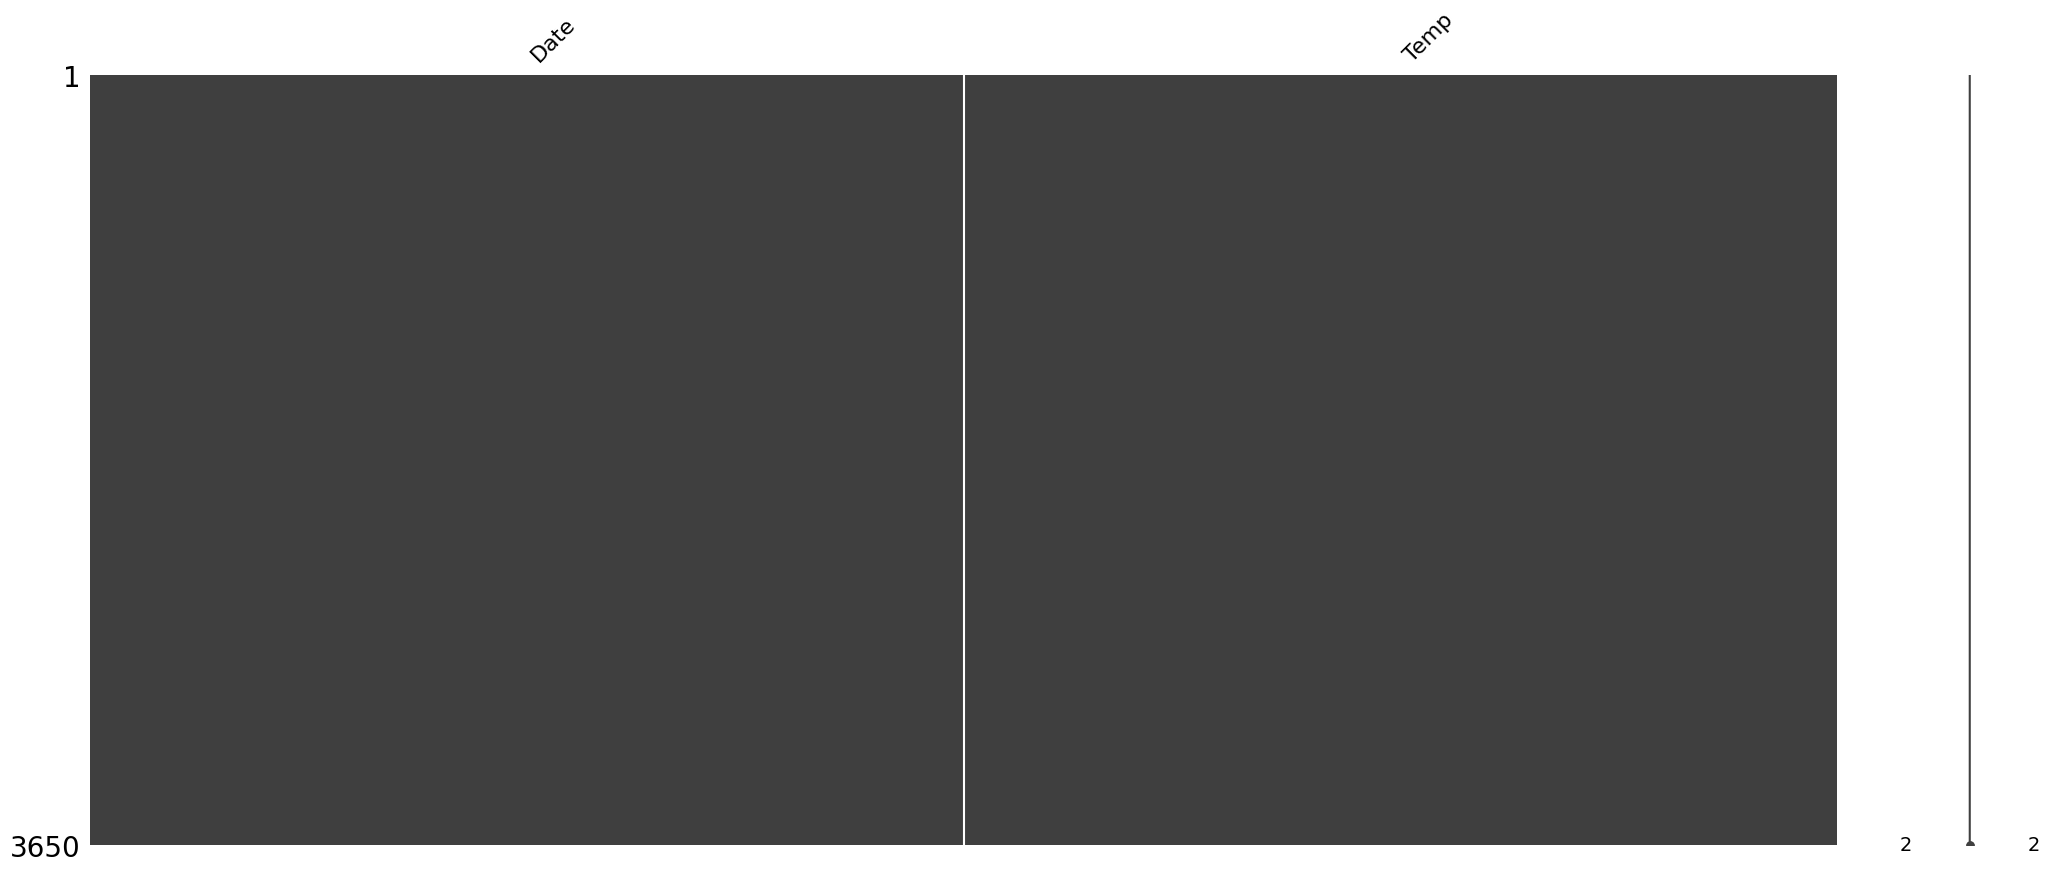

In [4]:
print('-' * 30)
print('Matrix of missing values :')
print('-' * 30)
mso.matrix(df_temp)
plt.show()

Checking for missing values

In [5]:
df_temp.isna().sum(axis=0)

Date    0
Temp    0
dtype: int64

Finding the number of distinct values ​​in each column

In [6]:
print('-' * 30)
print('Number of distinct values :')
print('-' * 30)
for col in df_temp:
    print(f"{col:20}\t{df_temp[col].value_counts().count()}")

------------------------------
Number of distinct values :
------------------------------
Date                	3650
Temp                	229


Finding the range of numbers in each column

In [7]:
print('-' * 30)
print('Range of numbers in each column :')
print('-' * 30)
print("".ljust(20), "Minimum".ljust(10), "Maximum".ljust(10))
for i in df_temp.columns:
    print(i.ljust(20), str(df_temp[i].min()).ljust(10), str(df_temp[i].max()).ljust(10))

------------------------------
Range of numbers in each column :
------------------------------
                     Minimum    Maximum   
Date                 1981-01-01 1990-12-31
Temp                 0.0        26.3      


Distribution for Temp

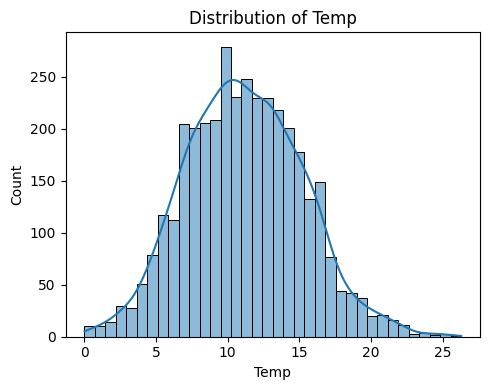

In [8]:
warnings.simplefilter(action='ignore', category=FutureWarning)

col = 'Temp'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))

sns.histplot(data=df_temp, x=col, kde=True, ax=axes)
axes.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Output box plot

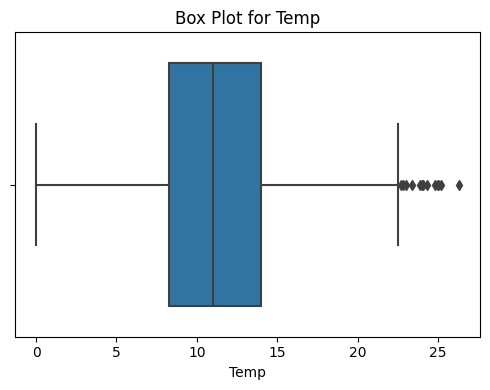

In [9]:
warnings.simplefilter(action='ignore', category=FutureWarning)

column_name = 'Temp'

fig, ax = plt.subplots(figsize=(5, 4))

sns.boxplot(data=df_temp, x=column_name, ax=ax)
ax.set_title(f'Box Plot for {column_name}')

plt.tight_layout()
plt.show()

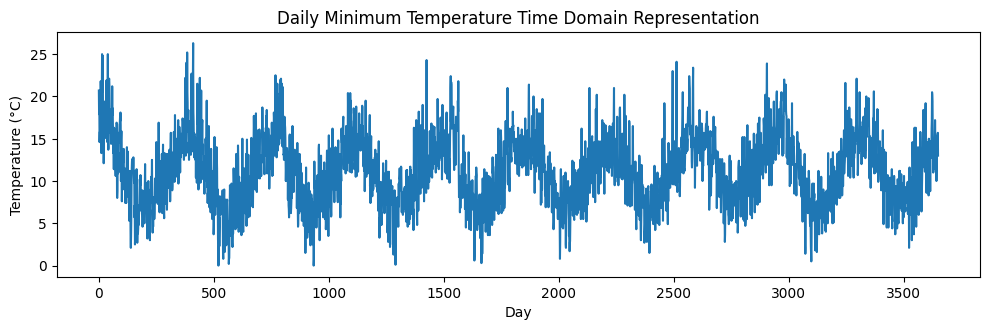

In [10]:
temperature = df_temp['Temp'].values

sz = 3650
x = np.arange(sz)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, temperature)
plt.title('Daily Minimum Temperature Time Domain Representation')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.savefig('temperature-graph.png')
plt.show()